# HW4 SVM

# Loading data and data transformation

In [1]:
import csv
import numpy
import scipy
from copy import deepcopy
import pandas as pd
import random
import math
from operator import itemgetter
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

data_list=[]
y=[]
data=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/HW4/allhyper.data'))
for row in data:
    data_list.append(row)
features=deepcopy(data_list[0])
data_list.pop(0)

####convert string to int
for i in range(len(data_list)):
    if data_list[i][29]=='negative.':
        data_list[i][29]=0
    else:
        data_list[i][29]=1
############
for i in range(len(data_list)):
    if data_list[i][1]=='F':
        data_list[i][1]=1
    elif data_list[i][1]=='M':
        data_list[i][1]=2
    else:
        data_list[i][1]=0
index_list=(2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,20,22,24,26)
for i in index_list:
    for j in range(len(data_list)):
        
        if data_list[j][i]=='f':
            data_list[j][i]=0
        else:
            data_list[j][i]=1
############
class_mean={}
def calculate_mean(n):
    sum=0
    index=0
    for i in range(len(data_list)):
        if data_list[i][n]!='NA':
            sum+=float(data_list[i][n])
            index+=1
    return sum/index
class_mean[0]=calculate_mean(0)
class_mean[17]=calculate_mean(17)
class_mean[19]=calculate_mean(19)
class_mean[21]=calculate_mean(21)
class_mean[23]=calculate_mean(23)
class_mean[25]=calculate_mean(25)
print class_mean
feature_list=(0,17,19,21,23,25)
for i in feature_list:
    for j in range(len(data_list)):
        if data_list[j][i]=='NA':
            data_list[j][i]=class_mean[i]
################            
whole_data=numpy.array(data_list)
trainx=whole_data[0:int(0.7*len(whole_data)),0:26]
trainy=whole_data[0:int(0.7*len(whole_data)),29]
testx=whole_data[int(0.7*len(whole_data)):len(whole_data),0:26]
testy=whole_data[int(0.7*len(whole_data)):len(whole_data),29]

{0: 51.8442300821722, 17: 4.672150238473764, 19: 2.0249661399548584, 21: 109.07240061162081, 23: 0.9979121054734302, 25: 110.78798403193613}


# SVM with linear kernel

In [15]:
f1_list=[]
f2_list=[]
i_list=[]
all_list=[]
trainyHat_list=[]
misclassificate_rate=[]
lamlist=list(numpy.logspace(-3,3,20))
for i in lamlist:
    clf = svm.SVC(C=i,kernel='linear')
    clf.fit(trainx,trainy)
    trainyHat=clf.predict(trainx)
    trainyHat_list.append(trainyHat)
    err=0
    for j in range(len(trainyHat)):
        
        if trainyHat[j]!=trainy[j]:
            err+=1
    misclassificate_rate.append(float(err)/float(len(trainyHat)))
    f1=f1_score(trainy, trainyHat, average='weighted')  
    f2=fbeta_score(trainy, trainyHat, average='weighted',beta=0.5)
    f1_list.append(f1)
    f2_list.append(f2)
    i_list.append(i)
    all_list.append((i,f1,f2,float(err)/float(len(trainyHat))))

# find out the best parameter C for linear kernel

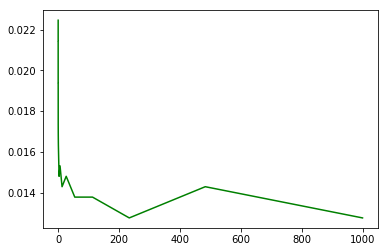

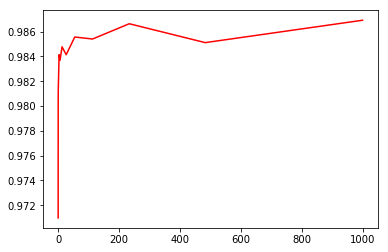

[(1000.0, 0.98691782903405134, 0.98677545609502948, 0.012761613067891782), (233.57214690901213, 0.98663590318803018, 0.98644521896530546, 0.012761613067891782), (54.555947811685144, 0.98556677544307247, 0.98534229698309617, 0.013782542113323124), (112.88378916846884, 0.98540425477706362, 0.98517106397629906, 0.013782542113323124), (483.29302385717523, 0.98511373115938072, 0.98488527441882923, 0.014293006636038795)]
[(233.57214690901213, 0.98663590318803018, 0.98644521896530546, 0.012761613067891782), (1000.0, 0.98691782903405134, 0.98677545609502948, 0.012761613067891782), (54.555947811685144, 0.98556677544307247, 0.98534229698309617, 0.013782542113323124), (112.88378916846884, 0.98540425477706362, 0.98517106397629906, 0.013782542113323124), (12.742749857031322, 0.98477652908660995, 0.9845209371795679, 0.014293006636038795)]


In [16]:
ax=plt.gca()
ax.plot(i_list,misclassificate_rate,"g",label="misclassification")
plt.show()
a=plt.gca()
a.plot(i_list,f1_list,"r",label="f1")
plt.show()

f1_sorted=sorted(all_list,key=itemgetter(1),reverse=True)
misclassification_sorted=sorted(all_list,key=itemgetter(3),reverse=False)
print f1_sorted[0:5]
print misclassification_sorted[0:5]

the best c for linear kernel is 1000, with highest f1 score at 0.98691782903405134, with err_rate at 0.012761613067891782

# find out the best parameter C,and degree for poly kernel

In [2]:
f1_list=[]
f2_list=[]
i_list=[]
all_list=[]
trainyHat_list=[]
misclassificate_rate=[]
d_list=[]
lamlist=list(numpy.logspace(-3,3,20))
for i in lamlist:
    for d in range(3):
        clf = svm.SVC(C=i,degree=d,kernel='poly')
        clf.fit(trainx,trainy)
        trainyHat=clf.predict(trainx)
        trainyHat_list.append(trainyHat)
        err=0
        for j in range(len(trainyHat)):
        
            if trainyHat[j]!=trainy[j]:
                err+=1
        print err
        misclassificate_rate.append(float(err)/float(len(trainyHat)))
        f1=f1_score(trainy, trainyHat, average='weighted')  
        f2=fbeta_score(trainy, trainyHat, average='weighted',beta=0.5)
        f1_list.append(f1)
        f2_list.append(f2)
        i_list.append(i)
        d_list.append(d)
        all_list.append((i,d,f1,f2,float(err)/float(len(trainyHat))))
        

51
44


/Users/wendy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


30
51
44
28
51
44
27
51
44
25
51
44
22
51
43
21
51
42
19
51
40
17
51
40
16
51
39
14
51
39
18
51
36
16
51
34
17
51
33
25
51
32
19
51
31
21
51
28
21
51
29
20
51
27
20
51
25
20


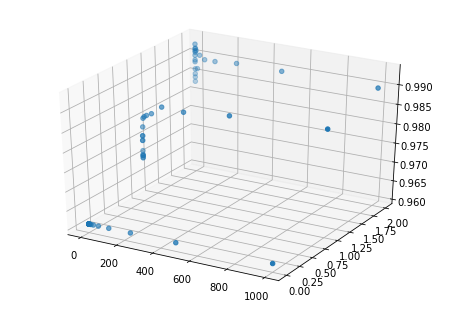

[(0.69519279617756058, 2, 0.9927113913002642, 0.99266229968103303, 0.0071465033180193975), (2.9763514416313162, 2, 0.99167016148601639, 0.99160805196997337, 0.00816743236345074), (0.33598182862837811, 2, 0.99158374623261958, 0.99151630238727517, 0.00816743236345074), (6.1584821106602607, 2, 0.99110412374315504, 0.99102867576377773, 0.008677896886166412), (0.16237767391887209, 2, 0.99101033583663134, 0.99093496312103846, 0.008677896886166412)]
[(0.69519279617756058, 2, 0.9927113913002642, 0.99266229968103303, 0.0071465033180193975), (0.33598182862837811, 2, 0.99158374623261958, 0.99151630238727517, 0.00816743236345074), (2.9763514416313162, 2, 0.99167016148601639, 0.99160805196997337, 0.00816743236345074), (0.16237767391887209, 2, 0.99101033583663134, 0.99093496312103846, 0.008677896886166412), (6.1584821106602607, 2, 0.99110412374315504, 0.99102867576377773, 0.008677896886166412)]


In [5]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(i_list,d_list,f1_list)
plt.show()
f1_sorted=sorted(all_list,key=itemgetter(2),reverse=True)
misclassification_sorted=sorted(all_list,key=itemgetter(4),reverse=False)
print f1_sorted[0:5]
print misclassification_sorted[0:5]

the optimal c is 0.69519279617756058, the optimal degree is 2, with f1 score :0.9927113913002642, err_rate: 0.0071465033180193975

# find out the best parameter C,and gamma for rbf kernel

In [ ]:
f1_list=[]
f2_list=[]
i_list=[]
all_list=[]
trainyHat_list=[]
misclassificate_rate=[]
gama_list=[]
lamlist=list(numpy.logspace(-1,4,20))
gamalist=list(numpy.logspace(-5,0,10))
for i in lamlist:
    for g in gamalist:
        clf = svm.SVC(C=i,gamma=g,kernel='rbf')
        clf.fit(trainx,trainy)
        trainyHat=clf.predict(trainx)
        trainyHat_list.append(trainyHat)
        err=0
        for j in range(len(trainyHat)):
        
            if trainyHat[j]!=trainy[j]:
                err+=1
        
        misclassificate_rate.append(float(err)/float(len(trainyHat)))
        f1=f1_score(trainy, trainyHat, average='weighted')  
        f2=fbeta_score(trainy, trainyHat, average='weighted',beta=0.5)
        f1_list.append(f1)
        f2_list.append(f2)
        i_list.append(i)
        gama_list.append(g)
        all_list.append((i,g,f1,f2,float(err)/float(len(trainyHat))))
        

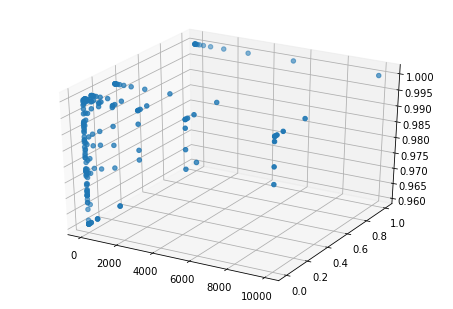

[(1.1288378916846888, 0.077426368268112777, 1.0, 1.0, 0.0), (1.1288378916846888, 0.27825594022071259, 1.0, 1.0, 0.0), (1.1288378916846888, 1.0, 1.0, 1.0, 0.0), (2.0691380811147893, 0.077426368268112777, 1.0, 1.0, 0.0), (2.0691380811147893, 0.27825594022071259, 1.0, 1.0, 0.0)]
[(1.1288378916846888, 0.077426368268112777, 1.0, 1.0, 0.0), (1.1288378916846888, 0.27825594022071259, 1.0, 1.0, 0.0), (1.1288378916846888, 1.0, 1.0, 1.0, 0.0), (2.0691380811147893, 0.077426368268112777, 1.0, 1.0, 0.0), (2.0691380811147893, 0.27825594022071259, 1.0, 1.0, 0.0)]


In [5]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(i_list,gama_list,f1_list)
plt.show()

f1_sorted=sorted(all_list,key=itemgetter(2),reverse=True)
misclassification_sorted=sorted(all_list,key=itemgetter(4),reverse=False)
print f1_sorted[0:5]
print misclassification_sorted[0:5]

the optimal c for rbf is 1.1288378916846888, the optimal gamma is 0.077426368268112777 with f1 score: 1 and err_rate: 0

In [12]:
def evaluation(trainx,trainy,testx,testy,clf):
    print clf
    clf.fit(trainx,trainy)
    trainyHat=clf.predict(trainx)
    linear_train_f1=f1_score(trainy, trainyHat, average='weighted') 
    testyHat=clf.predict(testx)
    linear_test_f1=f1_score(testy, testyHat, average='weighted') 
    return linear_train_f1,linear_test_f1

# evaluation metrics for the training and test set for all three models

In [21]:
clf = svm.SVC(C=1000,kernel='linear')
linear_train_f1,linear_test_f1=evaluation(trainx,trainy,testx,testy,clf)
linear_train_f1,linear_test_f1

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [23]:
clf = svm.SVC(C=0.69519279617756058,degree=2,kernel='poly')
poly_train_f1,poly_test_f1=evaluation(trainx,trainy,testx,testy,clf)

SVC(C=0.695192796178, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [24]:
clf = svm.SVC(C=1.1288378916846888,gamma=0.077426368268112777,kernel='rbf')
rbf_train_f1,rbf_test_f1=evaluation(trainx,trainy,testx,testy,clf)

SVC(C=1.12883789168, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0774263682681,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [25]:
print 'f1 score on training with linear kernel:',linear_train_f1 
print 'f1 score on testing with linear kernel:',linear_test_f1 
print 'f1 score on training with poly kernel:',poly_train_f1 
print 'f1 score on testing with poly kernel:',poly_test_f1 
print 'f1 score on training with rbf kernel:',rbf_train_f1 
print 'f1 score on testing with rbf kernel:',rbf_test_f1 

f1 score on training with linear kernel: 0.986917829034
f1 score on testing with linear kernel: 0.977142080437
f1 score on training with poly kernel: 0.9927113913
f1 score on testing with poly kernel: 0.978190802956
f1 score on training with rbf kernel: 1.0
f1 score on testing with rbf kernel: 0.953869329703


Table for f1 score:

|         |training|testing|
| ------------- |:-------------:|
|linear|0.986917829034|0.977142080437|
|poly|0.9927113913|0.978190802956|
|rbf|1.0|0.953869329703|

Generally, rbf kernel has a better berformance than poly kernel than linear kernel on both trsining and testing data. However although rbf kernel can have athe highest f1score of 1 on training data, it actually has a problem of overfitting, and has a wore performance on testing data on two other kernel